In [2]:
# from typing import tuple, int
import matplotlib.pyplot as plt
import math 
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import math

from ARIMA import ARIMA_model
import numpy as np

In [3]:
data = ['CPIAUCSL', 'GDPC1', 'CNP16OV', 'FEDFUNDS', 'LRUN64MAUSM156S', 'LRUN64FEUSM156S']

In [4]:
df = pdr.DataReader(
    data,
    "fred",
    start="1980-01-01",
    end="2025-07-01"
).astype(float).reset_index()

In [5]:
df['INF'] = 400 * np.log(df['CPIAUCSL']/ df['CPIAUCSL'].shift(-1))
df['INF_demeaned'] = df['INF'] - df['INF'].mean()

In [6]:
model  = ARIMA_model(df['INF_demeaned'].dropna(), (1,0,2))

In [7]:
model.fit()

((array([0.920197]), array([-0.41259821, -0.3075195 ]), 0.9081649630954517),
   message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
   success: True
    status: 0
       fun: 747.7330887857013
         x: [ 9.202e-01 -4.126e-01 -3.075e-01 -9.633e-02]
       nit: 6
       jac: [ 7.362e+01  3.339e+01  7.191e+01  1.093e+01]
      nfev: 150
      njev: 30
  hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>)

In [8]:
model.model_summary()

 ARIMA(1,0,2) Model Summary
Number of observations: 546
Number of parameters  : 4
-----------------------------------------
AR(1) coefficient:  0.9202
MA(1) coefficient: -0.4126
MA(2) coefficient: -0.3075
Variance (sigma^2):  0.9082
-----------------------------------------
Log-likelihood: -747.7331
AIC:  1503.4662
BIC:  1520.6767


{'log_likelihood': np.float64(-747.7330887857013),
 'aic': np.float64(1503.4661775714026),
 'bic': np.float64(1520.6766534743822),
 'params': {'ar': array([0.920197]),
  'ma': array([-0.41259821, -0.3075195 ]),
  'sigma2': 0.9081649630954517}}

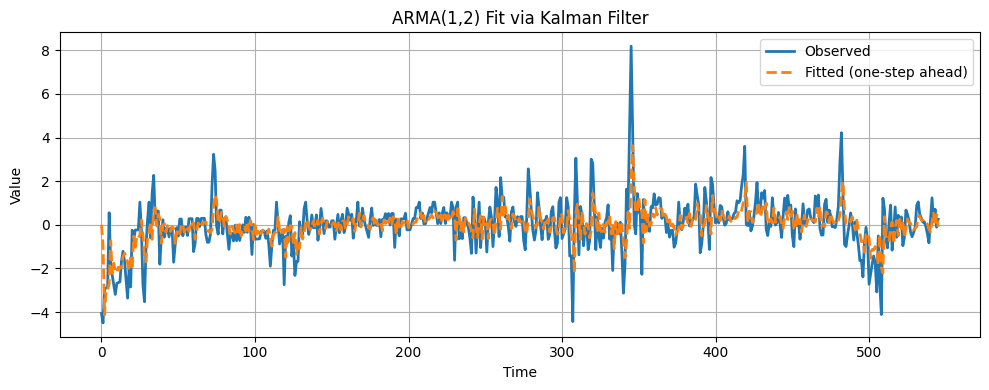

In [9]:
model.plot_fit()